In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns

In [2]:
def numeric_columns(df):
    numeric_cols = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numeric_cols.append(col)
    return numeric_cols

# Load dataset
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_2.csv")


df['MHW_category'].fillna("None", inplace=True)


print(df.shape)
print(df.columns)


(4474, 79)
Index(['Sample ID', 'Ammonium', 'Ammonium std', 'BG province', 'Basis',
       'Campaign', 'Chlorophyll a', 'Date', 'Date/Time', 'Depth Layer',
       'Depth Layer Zone', 'Depth bathy', 'Depth bot', 'Depth nominal',
       'Depth top', 'Event', 'Frac lower', 'Frac upper', 'Functional evenness',
       'Functional richness', 'Iron', 'Iron std', 'Latitude', 'Longitude',
       'MP biome', 'Max Lyapunov Exp', 'Method/Device', 'Net PP carbon',
       'Net PP carbon 30', 'Nitrate', 'Nitrate std', 'Nitrite', 'Nitrite std',
       'OS region', 'Okubo-Weiss', 'Particulate Inorganic Carbon',
       'Particulate Organic Carbon', 'Phosphate max', 'Phosphate median',
       'Phosphate min', 'Radiation', 'Radiation 30', 'Radiation 8.1',
       'Radiation 8.2', 'Residence time', 'SILVA_Chao', 'SILVA_Shannon',
       'SILVA_ace', 'SILVA_func_diversity', 'SILVA_species_rich',
       'Sample label', 'Sample material', 'Sample method', 'Sea Surface Temp',
       'Sea ice conc', 'Sea ice free 

In [3]:
def plot_feature_importance(importance_df, title, top_n=10, xlim=(0, 0.28)):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.iloc[:top_n],
                palette='viridis', hue='Feature', legend=False)
    plt.title(title, fontsize=14)
    plt.xlabel('Importance', fontsize=12)
    # plt.ylabel('Feature', fontsize=12)
    plt.ylabel('')
    plt.xlim(xlim)
    
    # Add numbers beside each bar
    for index, row in importance_df.iloc[:top_n].iterrows():
        plt.text(row['Importance'] + 0.004, index, round(row['Importance'], 3), va='center')

    plt.show()


# # Plot feature importance for 'MHWs' prediction
# plot_feature_importance(importance_df.iloc[:27],
#                         "Feature Importance for MHWs counts (top 15)",
#                         top_n=15, xlim=(0, 0.20))


### Classifier #1 - Categories (None, Moderate, Strong, Severe)

MHW_category
None        3528
Moderate     701
Strong       211
Severe        34
Name: count, dtype: int64
(3131, 56) (1343, 56) (3131,) (1343,)
Cross-validation scores: [0.296875   0.33928571 0.27008929 0.29017857 0.31319911 0.30872483
 0.23713647 0.24608501 0.20357942 0.26845638]
Mean CV accuracy: 0.27736097794822634
              precision    recall  f1-score   support

    Moderate       0.15      0.25      0.19       223
        None       0.78      0.35      0.48      1046
      Severe       0.00      0.00      0.00         8
      Strong       0.05      0.27      0.08        66

    accuracy                           0.32      1343
   macro avg       0.24      0.22      0.19      1343
weighted avg       0.63      0.32      0.41      1343



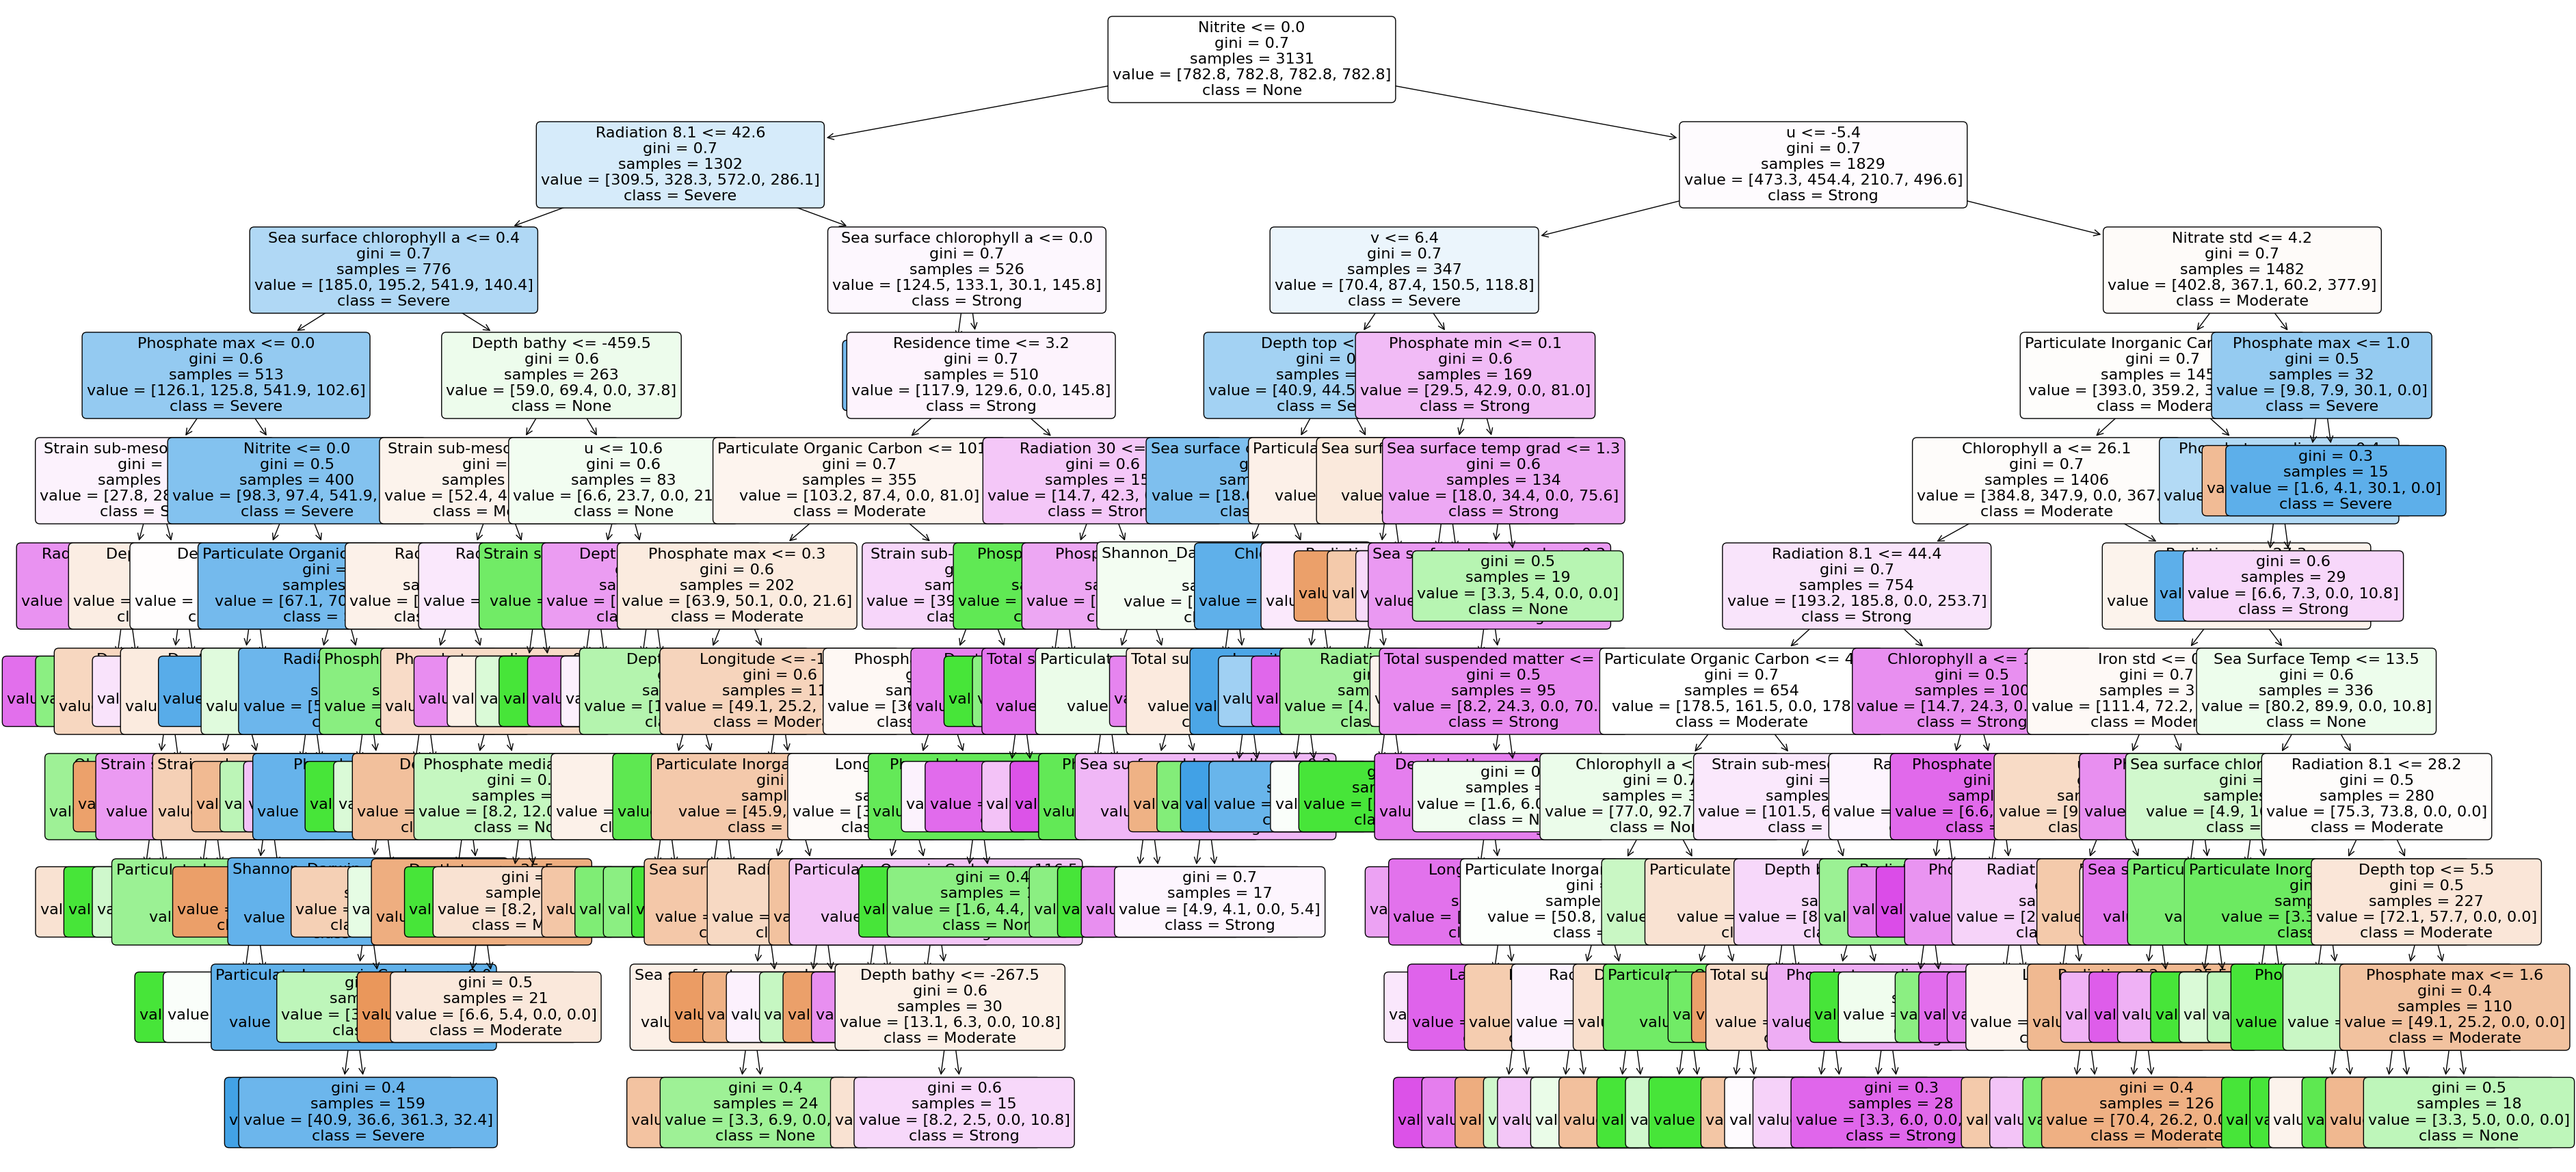

In [6]:
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_2.csv")

df['MHW_category'].fillna("None", inplace=True)

print(df['MHW_category'].value_counts())

# Separate features (X) and labels (y) after shuffling
y = df['MHW_category']


numeric_cols = numeric_columns(df)

df = df[numeric_cols]


# Shuffle the DataFrame
shuffled_df = shuffle(df, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df.drop(['MHW_count'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


clf = DecisionTreeClassifier(random_state=42, class_weight='balanced',
                             max_depth=10, min_samples_split=10,
                             min_samples_leaf=15, max_features=None)

# clf = DecisionTreeClassifier(random_state=22, class_weight='balanced')

# Define KFold with shuffle=True
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with shuffled data
cv_scores = cross_val_score(clf, X, y, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Train Decision Tree Classifier on full training data
clf.fit(X_train, y_train)

# Get the class names in the correct order
class_names = clf.classes_


# Model Evaluation on test data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(45,22))
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns,
          class_names=class_names, fontsize=16, precision=1,
          impurity=True, label='all')
plt.show()



### Classifier #2 - Categories (None, Moderate, Strong+)

MHW_category
None        3528
Moderate     701
Strong       211
Severe        34
Name: count, dtype: int64
MHW_category
None        3528
Moderate     701
Strong+      245
Name: count, dtype: int64
(3131, 56) (1343, 56) (3131,) (1343,)
Cross-validation scores: [0.32142857 0.27455357 0.36607143 0.38839286 0.45190157 0.29530201
 0.30201342 0.37583893 0.3064877  0.26621924]
Mean CV accuracy: 0.33482092921061046
              precision    recall  f1-score   support

    Moderate       0.18      0.39      0.24       223
        None       0.79      0.39      0.52      1046
     Strong+       0.06      0.28      0.10        74

    accuracy                           0.39      1343
   macro avg       0.34      0.36      0.29      1343
weighted avg       0.65      0.39      0.45      1343



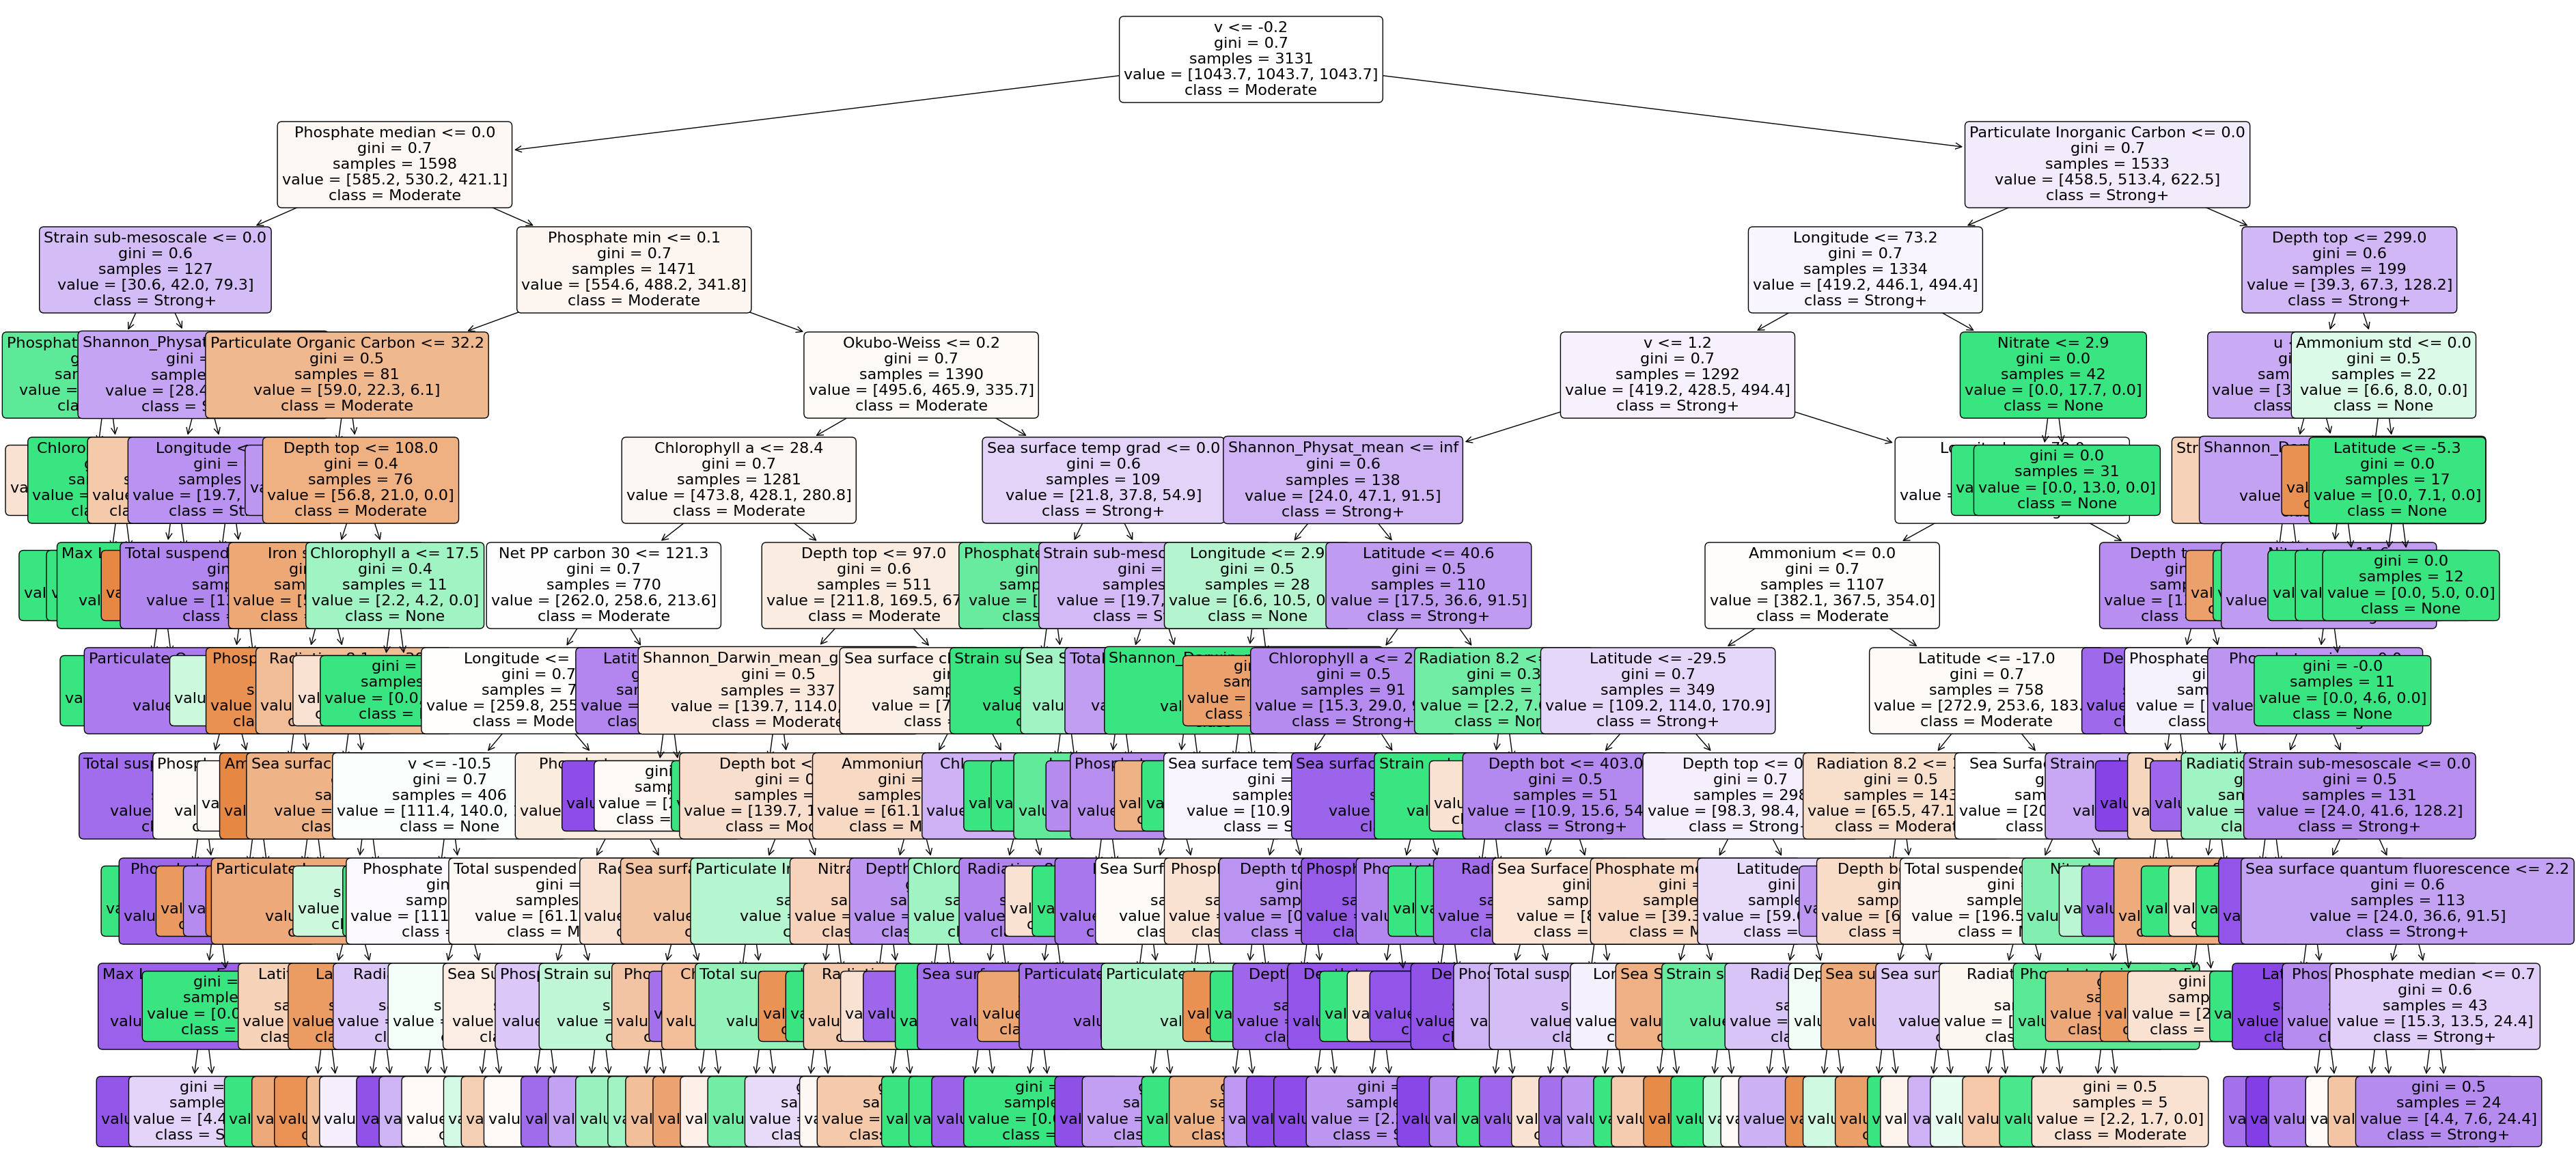

In [8]:
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_2.csv")

df['MHW_category'].fillna("None", inplace=True)

print(df['MHW_category'].value_counts())


# Replace values in 'count'
category_replace = {
    'Strong': 'Strong+',
    'Severe': 'Strong+',
}

# Apply replacements to 'MHWs count'
df['MHW_category'] = df['MHW_category'].replace(category_replace)

print(df['MHW_category'].value_counts())

# Separate features (X) and labels (y) after shuffling
y = df['MHW_category']


numeric_cols = numeric_columns(df)

df = df[numeric_cols]


# Shuffle the DataFrame
shuffled_df = shuffle(df, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df.drop(['MHW_count'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


clf = DecisionTreeClassifier(random_state=42, class_weight='balanced',
                             max_depth=10, min_samples_split=8,
                             min_samples_leaf=5, max_features=None)

# clf = DecisionTreeClassifier(random_state=22, class_weight='balanced')

# Define KFold with shuffle=True
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with shuffled data
cv_scores = cross_val_score(clf, X, y, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Train Decision Tree Classifier on full training data
clf.fit(X_train, y_train)

# Get the class names in the correct order
class_names = clf.classes_


# Model Evaluation on test data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(45,22))
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns,
          class_names=class_names, fontsize=16, precision=1,
          impurity=True, label='all')
plt.show()



### Hyperparameter optimizing

In [13]:
from sklearn.model_selection import GridSearchCV


df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_2.csv")

df['MHW_category'].fillna("None", inplace=True)

print(df['MHW_category'].value_counts())


# Replace values in 'count'
category_replace = {
    'Strong': 'Strong+',
    'Severe': 'Strong+',
}

# Apply replacements to 'MHWs count'
df['MHW_category'] = df['MHW_category'].replace(category_replace)

print(df['MHW_category'].value_counts())

# Separate features (X) and labels (y) after shuffling
y = df['MHW_category']


numeric_cols = numeric_columns(df)

df = df[numeric_cols]


# Shuffle the DataFrame
shuffled_df = shuffle(df, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df.drop(['MHW_count'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Define Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [7, 10, 15, 20, 25],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2'],
    # 'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 1.0],  # Adjust the range as needed
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, 
                           scoring='accuracy', verbose=2)

grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# Train Decision Tree Classifier on full training data with the best hyperparameters
best_clf.fit(X_train, y_train)

# Get the class names in the correct order
class_names = best_clf.classes_


# Model Evaluation on test data
y_pred = best_clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Plot Decision Tree
# plt.figure(figsize=(15, 12))
# plot_tree(best_clf, filled=True, feature_names=X.columns,
#           class_names=class_names, fontsize=10,
#           impurity=False)
# plt.show()


MHW_category
None        3528
Moderate     701
Strong       211
Severe        34
Name: count, dtype: int64
MHW_category
None        3528
Moderate     701
Strong+      245
Name: count, dtype: int64
Fitting 5 folds for each of 375 candidates, totalling 1875 fits
[CV] END max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=4; total time=   0.1s
[CV] END max_depth=7, max_featur

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_2.csv")

df['MHW_category'].fillna("None", inplace=True)

print(df['MHW_category'].value_counts())

# Separate features (X) and labels (y) after shuffling
y = df['MHW_category']


numeric_cols = numeric_columns(df)

df = df[numeric_cols]


# Shuffle the DataFrame
shuffled_df = shuffle(df, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df.drop(['MHW_count'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Define Decision Tree Classifier with desired hyperparameters
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')


# Train Decision Tree Classifier on full training data
dt.fit(X_train, y_train)

# Model Evaluation on test data
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))


# Get feature importances
feature_importances = dt.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df.reset_index(drop=True)
# print(importance_df)


# Plot feature importance for 'MHWs' prediction
plot_feature_importance(importance_df.iloc[:27],
                        "Feature Importance for MHWs categories (top 15)",
                        top_n=15, xlim=(0, 0.20))

# Feature importance per class
class_feature_importance = {}


# Iterate over each class
for class_label in dt.classes_:
    # Get binary labels for current class
    y_train_binary = (y_train == class_label)
    
    # Define Decision Tree Classifier for the current class
    dt_class = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    
    # Train Decision Tree Classifier on binary labels
    dt_class.fit(X_train, y_train_binary)
    
    # Get feature importances for the current class
    feature_importances_class = dt_class.feature_importances_
    
    # Create a DataFrame to store feature importances for the current class
    class_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_class})
    
    # Sort the DataFrame by importance and select top 5 features
    class_importance_df = class_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)
    
    # Store the top 5 feature importances in the dictionary
    class_feature_importance[class_label] = class_importance_df

# # Plot top 5 feature importance for each class
# for class_label, class_importance_df in class_feature_importance.items():
#     plot_feature_importance(class_importance_df,
#                             f'Top 10 Feature Importance for predicting class "{class_label}"',
#                             top_n=10, xlim=(0, 1))

